# Project: Investigating "No-show appointments" dataset.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>

## Introduction

> We're taking a look over a dataset containing information about wether a patient attend or not to a scheduled doctors appointment. Data is from Brasil, collected between november 2015 and June 2016. Goal
is to find valuable information, shedding some light on the reasons behind the fact of attending or not a doctors appointment.

> First, let's import all neccesary modules;

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

> Next we're reading the csv file (and make sure it is working).


In [35]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(1500)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


<a id='wrangling'></a>
## Data Wrangling

> Here we take a look to know what we are dealing with;

### General Properties

In [36]:
# Here we have some general statistic from the dataset using pandas .describe().

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [37]:
# .shape gives us total number of rows and columns.
df.shape

(110527, 14)

In [38]:
# .info() method gives information about null values and datatypes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> Already having questions in mind, we're dumping some information that doesn't seems to be useful; "Patient ID" and "Appointment ID".

> Then, "ScheduledDay" and "AppointmentDay" doesn't seems to be in the correct datatypes, since they're datetimes entrys. This need a previous step because both columns have innecesary letters in it.

> "No-show", our dependent variable, is going to be changed to 'DidShow' and 'Absent' for better communication. Also in the Gender column we're changing initials for full names.

> There's also an incorrect value in the "Age" column, pointing a negative value (-1). This is another thing we're dumping.

In [39]:
# Keeping only useful data;

df.drop(columns=['AppointmentID','PatientId'],inplace=True)

In [40]:
# Cheking columns;
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


In [41]:
# Changing "No-show";
df['No-show'] = df['No-show'].apply(lambda x: 'DidShow' if x=='No' else 'Absent')
df['Gender'] = df['Gender'].apply(lambda x: 'Male' if x=='M' else 'Female')

In [42]:
# Checking datatype;
df.head(5)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,Female,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,DidShow
1,Male,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,DidShow
2,Female,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,DidShow
3,Female,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,DidShow
4,Female,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,DidShow


In [43]:
# Cleaning datetimes strings;
df['ScheduledDay'] = df.ScheduledDay.str.replace('T',' ')
df['ScheduledDay'] = df.ScheduledDay.str.replace('Z','')
df['AppointmentDay'] = df.AppointmentDay.str.replace('T',' ')
df['AppointmentDay'] = df.AppointmentDay.str.replace('Z','')

In [44]:
# Checking results;
df.head(1500)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,Female,2016-04-29 18:38:08,2016-04-29 00:00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,DidShow
1,Male,2016-04-29 16:08:27,2016-04-29 00:00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,DidShow
2,Female,2016-04-29 16:19:04,2016-04-29 00:00:00,62,MATA DA PRAIA,0,0,0,0,0,0,DidShow
3,Female,2016-04-29 17:29:31,2016-04-29 00:00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,DidShow
4,Female,2016-04-29 16:07:23,2016-04-29 00:00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,DidShow
5,Female,2016-04-27 08:36:51,2016-04-29 00:00:00,76,REPÚBLICA,0,1,0,0,0,0,DidShow
6,Female,2016-04-27 15:05:12,2016-04-29 00:00:00,23,GOIABEIRAS,0,0,0,0,0,0,Absent
7,Female,2016-04-27 15:39:58,2016-04-29 00:00:00,39,GOIABEIRAS,0,0,0,0,0,0,Absent
8,Female,2016-04-29 08:02:16,2016-04-29 00:00:00,21,ANDORINHAS,0,0,0,0,0,0,DidShow
9,Female,2016-04-27 12:48:25,2016-04-29 00:00:00,19,CONQUISTA,0,0,0,0,0,0,DidShow


In [45]:
# Converting string to datetime;

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])


In [46]:
# Checking conversion;
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.1+ MB


> Here i'm doing some final cleaning in the 'ScheduledDay', leaving only date and dumping time data, since it will not be used to perform EDA (this is a metodological decision, we'll be focused in other variables for our analysis).

In [47]:
# Extracting date only;
df['ScheduledDay'] = df['ScheduledDay'].dt.date

In [48]:
# Checking data;
df.head(5)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,Female,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,DidShow
1,Male,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,DidShow
2,Female,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,DidShow
3,Female,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,DidShow
4,Female,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,DidShow


In [49]:
# Dumping negative age value(s);

NegativeAge = df[df['Age'] < 0 ].index
df.drop(NegativeAge, inplace=True)

In [50]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [51]:
# As we can see, just one row was erased. One final thing is to rename "No-show"
df.rename(columns={'No-show': 'NoShow'},inplace=True)

In [52]:
# Also found values exceding 0 or 1 in the 'Handcap' column. Lets delete those rows;
HCapErrors = df[df['Handcap'] > 1 ].index
df.drop(HCapErrors, inplace=True)

In [53]:
# Checking values;
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000
mean,37.070753,0.098281,0.196833,0.071605,0.030382,0.018509,0.321182
std,23.098052,0.297695,0.397607,0.257834,0.171638,0.134782,0.466932
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis

> Now we're ready to explore the dataset. 

### Research Question 1: ¿Wich features appears to be highly related with patiente attendance?

In [54]:
# First look;
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000
mean,37.070753,0.098281,0.196833,0.071605,0.030382,0.018509,0.321182
std,23.098052,0.297695,0.397607,0.257834,0.171638,0.134782,0.466932
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


> It seems that the age average of all the patiente's is around 37 years old, with a standar deviation of 23 years. The majority of patiente are between 18 and 55 years old.

> Almost 10% of the patiente are enrolled in 'Bolsa de familía'.

> Almost 20% have hipertension.

> Taking a look at the mean, we can see that nearly 20% of patiente didn't show up to the appointment.

In [55]:
df.NoShow.value_counts(normalize=True)

DidShow    0.798073
Absent     0.201927
Name: NoShow, dtype: float64

In [56]:
# Now we're creating masks to group people did and did not attend;
DidShow = df.NoShow == 'DidShow'
NotShow = df.NoShow == 'Absent'

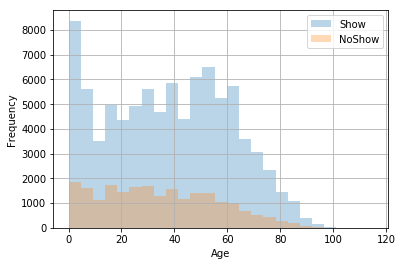

In [76]:
df.Age[DidShow].hist(alpha=0.3, label='Show',bins=25)
df.Age[NotShow].hist(alpha=0.3, label='NoShow',bins=25)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend();

> Age distribution is showing differences in attendance of certain age groups

Female    0.650158
Male      0.349842
Name: Gender, dtype: float64
Female    71730
Male      38597
Name: Gender, dtype: int64
110327


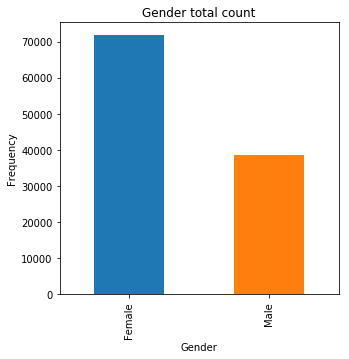

In [58]:

print(df.Gender.value_counts(normalize = True))
print(df.Gender.value_counts())
print(df.Gender.value_counts().sum())

ax = df.Gender.value_counts().plot(kind='bar',figsize=(5,5),title='Gender total count');
ax.set_ylabel('Frequency')
ax.set_xlabel('Gender')
plt.show()

> Looking by gender, there's a significant difference between these two in terms of quantity.

Gender  NoShow 
Female  DidShow    0.796905
        Absent     0.203095
Male    DidShow    0.800244
        Absent     0.199756
Name: NoShow, dtype: float64
Gender  NoShow 
Female  DidShow    57162
        Absent     14568
Male    DidShow    30887
        Absent      7710
Name: NoShow, dtype: int64
110327


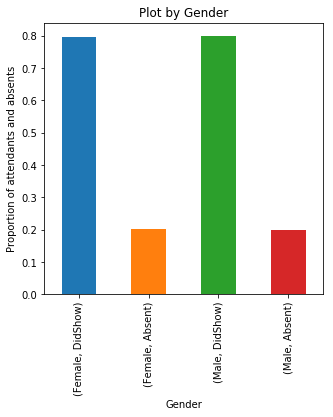

In [59]:
print(df.groupby('Gender').NoShow.value_counts(normalize = True))
print(df.groupby('Gender').NoShow.value_counts())
print(df.groupby('Gender').NoShow.value_counts().sum())


ax = df.groupby('Gender').NoShow.value_counts(normalize = True).plot(kind='bar',figsize=(5,5),title='Plot by Gender');
ax.set_ylabel('Proportion of attendants and absents')
ax.set_xlabel('Gender')
plt.show()

> However, proportion of patiente not showing stays the same, around 20%, with better rates in the Female's group.

DidShow    0.79369
Absent     0.20631
Name: NoShow, dtype: float64
DidShow    57660
Absent     14988
Name: NoShow, dtype: int64
72648


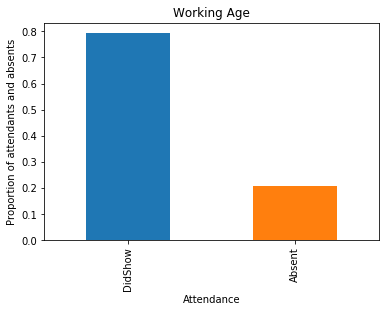

In [62]:
# These ranges are based on retirement and legal age to work in Brasil.

working_age = df.query('Age >= 16 and Age <= 65')
retiree = df.query('Age > 65')
childrens = df.query('Age >= 0 and Age < 16')

###################################################

print(working_age['NoShow'].value_counts(normalize = True))
print(working_age['NoShow'].value_counts())
print(working_age['NoShow'].value_counts().sum())
ax = working_age['NoShow'].value_counts(normalize=True).plot(kind='bar',title='Working Age')
ax.set_ylabel('Proportion of attendants and absents')
ax.set_xlabel('Attendance')
plt.show();

> This is the central distribution, proportion shows that 20% of people in this age group didn't show up.

DidShow    0.845277
Absent     0.154723
Name: NoShow, dtype: float64
DidShow    11194
Absent      2049
Name: NoShow, dtype: int64
13243


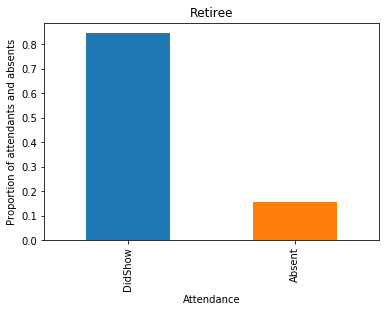

In [63]:
print(retiree['NoShow'].value_counts(normalize = True))
print(retiree['NoShow'].value_counts())
print(retiree['NoShow'].value_counts().sum())
ax = retiree['NoShow'].value_counts(normalize=True).plot(kind='bar',title='Retiree')
ax.set_ylabel('Proportion of attendants and absents')
ax.set_xlabel('Attendance')
plt.show();

> Retirees in the other hand show a nearly 5% decrease of absence.

DidShow    0.785521
Absent     0.214479
Name: NoShow, dtype: float64
DidShow    19195
Absent      5241
Name: NoShow, dtype: int64
24436


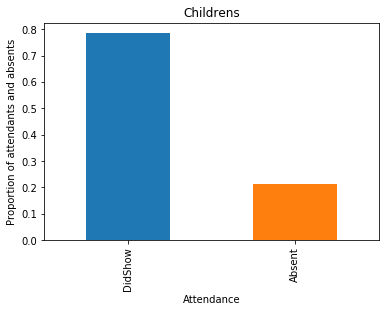

In [64]:
print(childrens['NoShow'].value_counts(normalize = True))
print(childrens['NoShow'].value_counts())
print(childrens['NoShow'].value_counts().sum())
ax = childrens['NoShow'].value_counts(normalize=True).plot(kind='bar',title='Childrens');
ax.set_ylabel('Proportion of attendants and absents')
ax.set_xlabel('Attendance')
plt.show();

> Kids between 0 and 16 years shows almost 1.5% higher absence rates.

In [65]:
Diabetes = df.query('Diabetes == 1')
NoDiabetes = df.query('Diabetes == 0')
print(Diabetes.shape)
print(NoDiabetes.shape)

(7900, 12)
(102427, 12)


DidShow    0.82
Absent     0.18
Name: NoShow, dtype: float64
DidShow    6478
Absent     1422
Name: NoShow, dtype: int64
7900


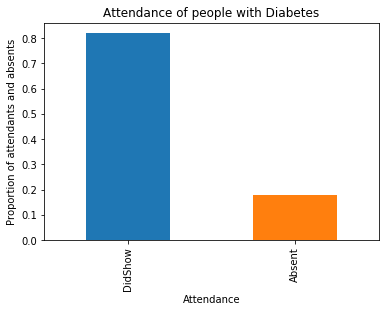

In [66]:
print(Diabetes['NoShow'].value_counts(normalize = True))
print(Diabetes['NoShow'].value_counts())
print(Diabetes['NoShow'].value_counts().sum())
ax = Diabetes['NoShow'].value_counts(normalize=True).plot(kind='bar',title='Attendance of people with Diabetes')
ax.set_ylabel('Proportion of attendants and absents')
ax.set_xlabel('Attendance')
plt.show();

DidShow    0.796382
Absent     0.203618
Name: NoShow, dtype: float64
DidShow    81571
Absent     20856
Name: NoShow, dtype: int64
102427


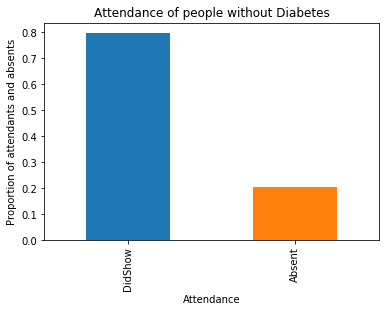

In [67]:
print(NoDiabetes['NoShow'].value_counts(normalize = True))
print(NoDiabetes['NoShow'].value_counts())
print(NoDiabetes['NoShow'].value_counts().sum())
ax = NoDiabetes['NoShow'].value_counts(normalize=True).plot(kind='bar',title='Attendance of people without Diabetes')
ax.set_ylabel('Proportion of attendants and absents')
ax.set_xlabel('Attendance')
plt.show();

> Diabetes group shows better attendance rates.

In [68]:
Alcoholic = df.query('Alcoholism == 1')
NoAlcoholic = df.query('Alcoholism == 0')
print(Alcoholic.shape)
print(NoAlcoholic.shape)

(3352, 12)
(106975, 12)


DidShow    0.798628
Absent     0.201372
Name: NoShow, dtype: float64
DidShow    2677
Absent      675
Name: NoShow, dtype: int64
3352


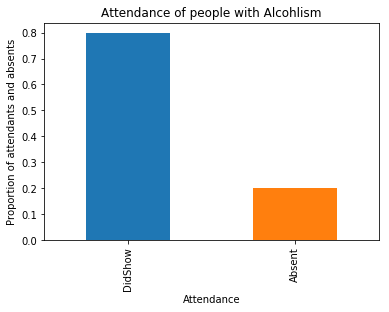

In [69]:
print(Alcoholic['NoShow'].value_counts(normalize = True))
print(Alcoholic['NoShow'].value_counts())
print(Alcoholic['NoShow'].value_counts().sum())
ax = Alcoholic['NoShow'].value_counts(normalize=True).plot(kind='bar',title='Attendance of people with Alcohlism')
ax.set_ylabel('Proportion of attendants and absents')
ax.set_xlabel('Attendance')
plt.show();

DidShow    0.798056
Absent     0.201944
Name: NoShow, dtype: float64
DidShow    85372
Absent     21603
Name: NoShow, dtype: int64
106975


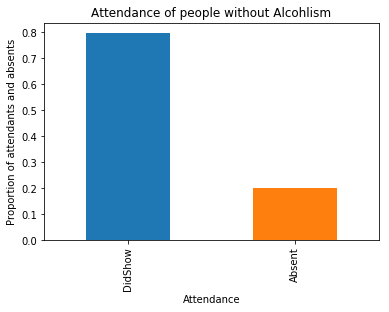

In [70]:
print(NoAlcoholic['NoShow'].value_counts(normalize = True))
print(NoAlcoholic['NoShow'].value_counts())
print(NoAlcoholic['NoShow'].value_counts().sum())
ax = NoAlcoholic['NoShow'].value_counts(normalize=True).plot(kind='bar',title='Attendance of people without Alcohlism')
ax.set_ylabel('Proportion of attendants and absents')
ax.set_xlabel('Attendance')
plt.show();

> Looking at alcoholism, proportion stays almost equal.

### Research Question 2: ¿Does 'Bolsa de familía' have a positive impact when looking at children's attendance?

> According to this site (https://plataformacelac.org/programa/99) Bolsa Familía asks as a requirement to apply the whole vaccine calendar to childs between 0 and 7 years. Here we're trying to see if enrolled familys have higher attendance than the ones who don't: 

In [71]:
Enrolled_bolsa = df.query('Age >= 0 and Age <= 7 and Scholarship == 1')
NotEnrolled_bolsa = df.query('Age >= 0 and Age <= 7 and Scholarship == 0')

print(Enrolled_bolsa.shape)
print(NotEnrolled_bolsa.shape)

(1219, 12)
(13453, 12)


DidShow    0.799016
Absent     0.200984
Name: NoShow, dtype: float64
DidShow    974
Absent     245
Name: NoShow, dtype: int64
1219


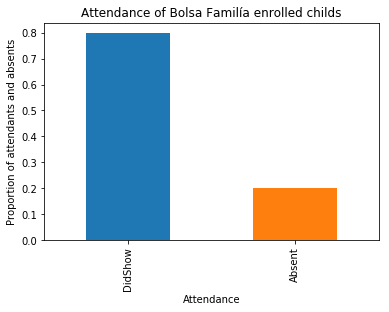

In [72]:
print(Enrolled_bolsa['NoShow'].value_counts(normalize = True))
print(Enrolled_bolsa['NoShow'].value_counts())
print(Enrolled_bolsa['NoShow'].value_counts().sum())
ax = Enrolled_bolsa['NoShow'].value_counts(normalize=True).plot(kind='bar',title='Attendance of Bolsa Familía enrolled childs')
ax.set_ylabel('Proportion of attendants and absents')
ax.set_xlabel('Attendance')
plt.show();

DidShow    0.810005
Absent     0.189995
Name: NoShow, dtype: float64
DidShow    10897
Absent      2556
Name: NoShow, dtype: int64
13453


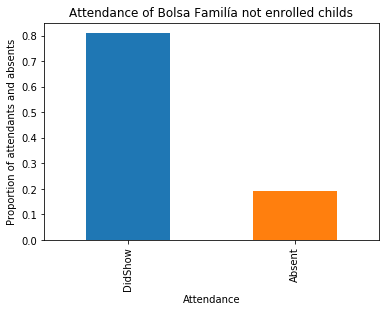

In [73]:
print(NotEnrolled_bolsa['NoShow'].value_counts(normalize = True))
print(NotEnrolled_bolsa['NoShow'].value_counts())
print(NotEnrolled_bolsa['NoShow'].value_counts().sum())
ax = NotEnrolled_bolsa['NoShow'].value_counts(normalize=True).plot(kind='bar',title='Attendance of Bolsa Familía not enrolled childs')
ax.set_ylabel('Proportion of attendants and absents')
ax.set_xlabel('Attendance')
plt.show();

<a id='conclusions'></a>
## Conclusions

> We decided to take a look to certain features, although we could still ask a lot more questions. Our focus was to calculte difference between age groups, gender, alcohlism, diabetes, and impact of enrolling childs to Bolsa Familía, just looking for correlations. Despite quantity differences, attendance proportion by gender is nearly the same, with Males having higher absence rate. Age groups showed better attendance rates in the retiree group rather than those in Work Age and Child groups. Alcohlism showed almost no impact in attendance rates and the Diabetes groups showed better attendance rates. Also, proportion of attendance between childs enrolled in Bolsa Familía and those who doesn't showed better rates on the latter's behalfs.


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [75]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0